# Tarea 3. Algoritmos Genéticos: Problema de agrupamiento de N elementos en 1 Dimensión

## Fundamentos de inteligencia computacional
## por: Juan Pablo Arango A. & Simón Zapata Caro

### Problema de optimización:

#### Parámetros:
- $N$: número de elementos del problema
- $K$: número de grupos
- $\textbf{X}=[x_n]$: datos en $R^2$

#### Variables:
- $[c_0, c_1, c_2 ..., c_n,... c_{N-1}]$: pertenencia del dato $x_n$ al cluster $C_k
$

#### Tipo de problema
- Minimización de la distancia entre los datos.
- Maximización del inverso de las distancias

#### Función de fitness:
## max:  $F(\textbf{X})=\frac{1}{\sum_{k=0}^{N_k-1}(\sum_{x_i\in C_k}\sum_{x_j\in C_k, j > i}||x_i-x_j||) }$


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd

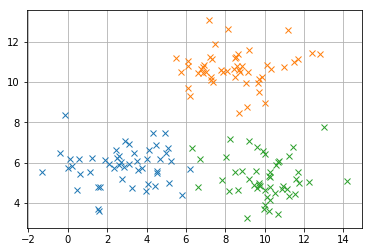

In [17]:
def indexData(N,K):
    n = []
    for i in range(K-1):
        n.append(int(N/K))
    n.append(N-(K-1)*int(N/K))
    return n
########Set parameters########################
N = 150
K = 3
n = indexData(N,K)
##############################################

meanMatrix = np.array([[2.5,6],[8,11],[10,5]])
cov        = [[3,0],[0,1]]
x1,x2 = np.random.multivariate_normal(meanMatrix[0],cov,n[0]).T
x1,x2 = x1.reshape(len(x1),1),x2.reshape(len(x2),1)
plt.plot(x1,x2,'x')
labels = np.zeros(N)
for k in range(1,K):
    mean = meanMatrix[k]
    x,y  = np.random.multivariate_normal(mean,cov,n[k]).T
    x,y  = x.reshape(len(x),1),y.reshape(len(y),1)
    x1,x2 = np.vstack((x1,x)),np.vstack((x2,y))
    labels[(k)*x.shape[0]:]=k
    plt.plot(x,y,'x') 
plt.grid()
plt.show()

data = np.zeros((1,N), dtype=(float,2))
for i in range(N):
    data[0,i,0] = x1[i]
    data[0,i,1] = x2[i]
    
index = np.random.permutation(np.arange(N))

data   = data[:,index,:]
labels = labels[index]

In [18]:
################set objective function##################

def F1(C,x,K): #x is an arrray w/ size = (1,length)
    acum = np.zeros(C.shape[0])
    for pop in range(C.shape[0]):
        n = []
        for k in range(K):
            c = np.where(C[pop,:]==k)[0]
            n.append([c])
        
        for k in range(K):
            for i in range(len(n[k][0])):
                for j in range(i,len(n[k][0])):
                    acum[pop] += np.linalg.norm(x[:,n[k][0][i],:]-x[:,n[k][0][j],:])
    
    return 1.0/acum
#########################################################

##########Mutation Function##############################

def mutationFuction(Chromosome,x,K=3):
    Value = []
    n = []
    Chromosome = Chromosome.reshape(1,N)
    for k in range(K):
        c = np.where(Chromosome[0,:]==k)[0]
        n.append([c])
    for k in range(K):
        acum = 0.0
        for i in range(len(n[k][0])):
            for j in range(i,len(n[k][0])):
                acum += np.linalg.norm(x[:,n[k][0][i],:]-x[:,n[k][0][j],:])
        Value.append(acum)
    bestCluster = np.argmin(Value)
    while True:
        r1=np.random.randint(0,Chromosome.shape[1])
        if int(bestCluster)!= int(Chromosome[:,r1]):
            break
    Child = Chromosome
    Child[:,r1]=np.random.randint(K)
    
    return Child

#########################################################

In [19]:
##########Crossover Function##############################
def crossoverFunction(Chromosome_1,Chromosome_2,x,K=3):
    Chromosome_1 = Chromosome_1.reshape(1,N)
    Chromosome_2 = Chromosome_2.reshape(1,N)
    
    Child_1 = Chromosome_1
    Child_2 = Chromosome_2
    for i in range(Chromosome_1.shape[1]):
        th = np.random.rand(1)
        if th >=0.5:
            Child_1[:,i] = Chromosome_2[:,i]
            Child_2[:,i] = Chromosome_1[:,i]
                
    return Child_1,Child_2
#########################################################

# Algoritmo Genético

In [20]:
population = 20  #population size
Tm = 0.4         #mutation rate
Tc = 0.4         #crossover rate: % of couples selected for crossover
var = N          #optimization problem number of variables
Ngen = 500       #Number of generations

generación:  0 , con valor óptimo =  0
generación:  1 , con valor óptimo =  5.005376101317151e-05
generación:  2 , con valor óptimo =  5.022240847981836e-05
generación:  3 , con valor óptimo =  5.022240847981836e-05
generación:  4 , con valor óptimo =  5.022240847981836e-05
generación:  5 , con valor óptimo =  5.022240847981836e-05
generación:  6 , con valor óptimo =  5.1064148086712365e-05
generación:  7 , con valor óptimo =  5.124253030387328e-05
generación:  8 , con valor óptimo =  5.124253030387328e-05
generación:  9 , con valor óptimo =  5.124253030387328e-05
generación:  10 , con valor óptimo =  5.1644434528518136e-05
generación:  11 , con valor óptimo =  5.206359209235098e-05
generación:  12 , con valor óptimo =  5.206359209235098e-05
generación:  13 , con valor óptimo =  5.235344006937619e-05
generación:  14 , con valor óptimo =  5.235344006937619e-05
generación:  15 , con valor óptimo =  5.237863666249435e-05
generación:  16 , con valor óptimo =  5.261860970850735e-05
generaci

generación:  137 , con valor óptimo =  6.870316580346821e-05
generación:  138 , con valor óptimo =  6.914948534371724e-05
generación:  139 , con valor óptimo =  6.93470428290718e-05
generación:  140 , con valor óptimo =  6.93470428290718e-05
generación:  141 , con valor óptimo =  6.93470428290718e-05
generación:  142 , con valor óptimo =  6.93470428290718e-05
generación:  143 , con valor óptimo =  6.93470428290718e-05
generación:  144 , con valor óptimo =  6.949434007397223e-05
generación:  145 , con valor óptimo =  6.949434007397223e-05
generación:  146 , con valor óptimo =  6.953289492514846e-05
generación:  147 , con valor óptimo =  6.985043686295123e-05
generación:  148 , con valor óptimo =  6.985043686295123e-05
generación:  149 , con valor óptimo =  6.985043686295123e-05
generación:  150 , con valor óptimo =  6.985043686295123e-05
generación:  151 , con valor óptimo =  6.985043686295123e-05
generación:  152 , con valor óptimo =  6.985043686295123e-05
generación:  153 , con valor 

generación:  272 , con valor óptimo =  9.858102362870552e-05
generación:  273 , con valor óptimo =  9.858102362870552e-05
generación:  274 , con valor óptimo =  9.858102362870552e-05
generación:  275 , con valor óptimo =  9.858102362870552e-05
generación:  276 , con valor óptimo =  9.858102362870552e-05
generación:  277 , con valor óptimo =  9.858102362870552e-05
generación:  278 , con valor óptimo =  9.858102362870552e-05
generación:  279 , con valor óptimo =  0.00010054036532509877
generación:  280 , con valor óptimo =  0.00010054036532509877
generación:  281 , con valor óptimo =  0.00010054036532509877
generación:  282 , con valor óptimo =  0.00010054036532509877
generación:  283 , con valor óptimo =  0.00010054036532509877
generación:  284 , con valor óptimo =  0.00010054036532509877
generación:  285 , con valor óptimo =  0.00010054036532509877
generación:  286 , con valor óptimo =  0.00010054036532509877
generación:  287 , con valor óptimo =  0.00010054036532509877
generación:  28

generación:  405 , con valor óptimo =  0.00011236491170000161
generación:  406 , con valor óptimo =  0.00011236491170000161
generación:  407 , con valor óptimo =  0.00011236491170000161
generación:  408 , con valor óptimo =  0.00011236491170000161
generación:  409 , con valor óptimo =  0.00011236491170000161
generación:  410 , con valor óptimo =  0.00011236491170000161
generación:  411 , con valor óptimo =  0.00011236491170000161
generación:  412 , con valor óptimo =  0.00011236491170000161
generación:  413 , con valor óptimo =  0.00011236491170000161
generación:  414 , con valor óptimo =  0.00011236491170000161
generación:  415 , con valor óptimo =  0.00011236491170000161
generación:  416 , con valor óptimo =  0.00011236491170000161
generación:  417 , con valor óptimo =  0.00011236491170000161
generación:  418 , con valor óptimo =  0.00011236491170000161
generación:  419 , con valor óptimo =  0.00011236491170000161
generación:  420 , con valor óptimo =  0.00011236491170000161
generaci

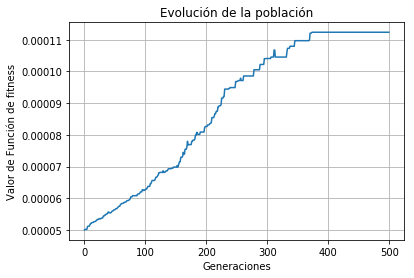

In [21]:
##########Initial Population##########################
Pop = np.random.randint(K,size=((population,var)))
######################################################

X  = []
y  = []

optim_value_before = 0
for gen in range(Ngen):
    #if(gen%20 == 0):
    print('generación: ',gen, ', con valor óptimo = ',optim_value_before)
    #####Fitness evaluation#########################################
    Fitness = F1(Pop,x=data,K=K)
    
    BestIndividuos = np.argsort(-Fitness,axis=0)
    Pop = Pop[BestIndividuos.flatten()]
    Wheel = np.cumsum(Fitness[BestIndividuos.flatten()])/np.sum(Fitness[BestIndividuos.flatten()])
    Wheel = Wheel.reshape(len(Wheel),1)
    #################################################################
    
    #####Crossover:  Multi-point*****################################
    for parent in range(int(Tc*population)):
        P = np.random.rand(1)
        ParentSelected_1 = np.where(Wheel >= P)[0][0]
        while True:
            P = np.random.rand(1)
            ParentSelected_2 = np.where(Wheel >= P)[0][0]
            if ParentSelected_1 != ParentSelected_2:
                break
        
        """#Multi-point crossover
        Child_1 = np.hstack((np.array_split(Pop[ParentSelected_1],3)[0],
                             np.array_split(Pop[ParentSelected_2],3)[1],
                             np.array_split(Pop[ParentSelected_1],3)[2]))
        Child_2 = np.hstack((np.array_split(Pop[ParentSelected_2],3)[0],
                             np.array_split(Pop[ParentSelected_1],3)[1],
                             np.array_split(Pop[ParentSelected_2],3)[2]))"""
        Child_1,Child_2 = crossoverFunction(Pop[ParentSelected_1],Pop[ParentSelected_2],data,K)
        
        #Add to population
        Pop = np.vstack((Pop,Child_1,Child_2))
    #################################################################
    
    #####Fitness evaluation for Mutation#########################################
    Fitness = F1(Pop,x=data,K=K)
    
    BestIndividuos = np.argsort(-Fitness,axis=0)
    Pop = Pop[BestIndividuos.flatten()]
    Wheel = np.cumsum(Fitness[BestIndividuos.flatten()])/np.sum(Fitness[BestIndividuos.flatten()])
    Wheel = Wheel.reshape(len(Wheel),1)
    #################################################################
    
    ##### Mutation: Wheel - switch 2 positions#######################
    for parent in range(int(Tm*population)):
        P = np.random.rand(1)
        ParentSelected = np.where(Wheel >= P)[0][0]
        
        Child = mutationFuction(Pop[ParentSelected],x=data,K=K)
        
        #Add to population
        Pop = np.vstack((Pop,Child))
    #################################################################
        
    #####Selection: using Fitness####################################
    Fitness = F1(Pop,x=data,K=K)
    BestIndividuos = np.argsort(-Fitness,axis=0)
    Pop = Pop[BestIndividuos.flatten()[:population]]
    #################################################################
    
    optim_value = max(F1(Pop,x=data,K=K))
    if(optim_value_before<optim_value):
        optim_value_before = optim_value
        i = np.argmax(F1(Pop,x=data,K=K),axis=0)
        Cmax = Pop[i,:]
    X.append(gen)
    y.append(optim_value)
plt.plot(X,y)
plt.title('Evolución de la población')
plt.xlabel('Generaciones')
plt.ylabel('Valor de Función de fitness')
plt.grid()
    
plt.show()

In [22]:
print('valor óptimo calculado por la heurística = ', optim_value_before)
C = Cmax
C = C.reshape(1,len(C))

n=[]
for k in range(K):
    c = np.where(C[0,:]==k)[0]
    n.append(c)
    #print('Datos al Cluster ',k+1,': ',n[k])

valor óptimo calculado por la heurística =  0.00011236491170000161


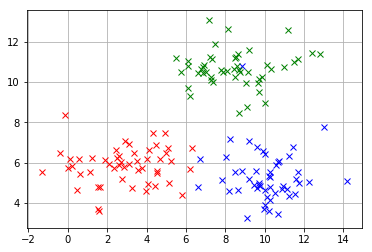

In [23]:
n = []
colors=['r','b','g']
for k in range(K):
    c = np.where(C[0,:]==k)[0]
    n.append(c)
    plt.plot(data[:,n[k],0], data[:,n[k],1],colors[k]+'x')
    plt.grid()
plt.show()

In [24]:
Clabels = Cmax
Cmax,labels

(array([2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2,
        2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
        0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1,
        2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0,
        1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2,
        0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2,
        1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0]),
 array([1., 0., 1., 1., 0., 2., 2., 0., 2., 1., 0., 0., 1., 1., 2., 0., 0.,
        0., 0., 0., 0., 1., 1., 2., 2., 0., 1., 2., 0., 2., 1., 2., 0., 2.,
        1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 0., 0., 2., 1., 2., 1., 1.,
        0., 0., 1., 2., 1., 1., 0., 2., 2., 0., 1., 0., 2., 1., 2., 1., 0.,
        1., 1., 0., 2., 1., 0., 0., 0., 0., 2., 1., 2., 2., 2., 1., 2., 0.,
        0., 2., 0., 2., 1., 1., 0., 0., 0., 1., 1., 2., 2., 2., 0., 1., 2.,
        1., 0., 1., 2., 2., 2., 2., 

In [39]:
Clabels[np.where(Cmax==0)[0]] = 0.0
Clabels[np.where(Cmax==1)[0]] = 2.0
Clabels[np.where(Cmax==2)[0]] = 1.0
Clabels,labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1., 0., 1., 1., 0., 2., 2., 0., 2., 1., 0., 0., 1., 1., 2., 0., 0.,
        0., 0., 0., 0., 1., 1., 2., 2., 0., 1., 2., 0., 2., 1., 2., 0., 2.,
        1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 0., 0., 2., 1., 2., 1., 1.,
        0., 0., 1., 2., 1., 1., 0., 2., 2., 0., 1., 0., 2., 1., 2., 1., 0.,
        1., 1., 0., 2., 1., 0., 0., 0., 0., 2., 1., 2., 2., 2., 1., 2., 0.,
        0., 2., 0., 2., 1., 1., 0., 0., 0., 1., 1., 2., 2., 2., 0., 1., 2.,
        1., 0., 1., 2., 2., 2., 2., 

In [40]:
print('accuracy: ', 100*np.sum(Clabels==labels)/N,'%')
1*(Clabels==labels)

accuracy:  33.333333333333336 %


array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])